In [436]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt  
import seaborn as sns
from scipy import stats
#For some Statistics
from scipy.stats import norm, skew
from sklearn.preprocessing import Imputer

In [180]:
bank_full = pd.read_csv("bank/bank-full.csv",delimiter=';') 
bank_add_full = pd.read_csv("bank-additional/bank-additional-full.csv",delimiter=';') 
bank_test= pd.read_csv("bank/bank.csv",delimiter=';') 

df= bank_full.copy();
df_add= bank_add_full.copy()
df_add.replace('unknown',np.nan,inplace=True)
df_add.isnull().sum()

# df.loc[:,'y'].value_counts()
# df.shape

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [153]:
df.select_dtypes (include=object) 
df_add.select_dtypes (include=object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,0,0,0,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,0,0,telephone,may,mon,nonexistent
2,services,married,high.school,0,1,0,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,0,0,0,telephone,may,mon,nonexistent
4,services,married,high.school,0,0,1,telephone,may,mon,nonexistent
5,services,married,basic.9y,unknown,0,0,telephone,may,mon,nonexistent
6,admin.,married,professional.course,0,0,0,telephone,may,mon,nonexistent
7,blue-collar,married,unknown,unknown,0,0,telephone,may,mon,nonexistent
8,technician,single,professional.course,0,1,0,telephone,may,mon,nonexistent
9,services,single,high.school,0,1,0,telephone,may,mon,nonexistent


In [190]:

df= bank_full.copy();
df_add= bank_add_full.copy()
df_add.replace('unknown',np.nan,inplace=True)
df_add.isnull().sum()

df_add['job'].value_counts()
df_add['job'].replace(np.nan,df_add['job'].mode()[0],inplace=True)
df_add['marital'].replace(np.nan,df_add['marital'].mode()[0],inplace=True)
df_add['education'].replace(np.nan,df_add['education'].mode()[0],inplace=True)
df_add['housing'].replace(np.nan,df_add['housing'].mode()[0],inplace=True)
df_add['loan'].replace(np.nan,df_add['loan'].mode()[0],inplace=True)
df_add['default'].replace(np.nan,'unknown',inplace=True)
df_add['housing']=df_add['housing'].replace(['no','yes'],[0,1])
df_add['loan']=df_add['loan'].replace(['no','yes'],[0,1])
df_add['y']=df_add['y'].replace(['no','yes'],[0,1])
one_hot_encoding=pd.get_dummies(df_add[['job','marital','education','default','contact','month', 'day_of_week','poutcome']], drop_first=True)
df_add=pd.concat([df_add,one_hot_encoding],axis=1)
df_add.drop(['job','marital','education','default','contact','month', 'day_of_week','poutcome'],inplace=True,axis=1)
df_add.head()


,age,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,0,0,261,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,1,0,0,0,1,0
1,57,0,0,149,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,1,0,0,0,1,0
2,37,1,0,226,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,1,0,0,0,1,0
3,40,0,0,151,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,1,0,0,0,1,0
4,56,0,1,307,1,999,0,1.1,93.994,-36.4,...,1,0,0,0,1,0,0,0,1,0


In [191]:
df= df_add.copy()

In [163]:
# df['job'].value_counts()
# df['job'].replace('unknown',df['job'].mode()[0],inplace=True)
# df['default']=df['default'].replace(['no','yes'],[0,1])
# df['housing']=df['housing'].replace(['no','yes'],[0,1])
# df['loan']=df['loan'].replace(['no','yes'],[0,1])
# df['y']=df['y'].replace(['no','yes'],[0,1])
# one_hot_encoding=pd.get_dummies(df[['job','marital','education','contact','month','poutcome']], drop_first=True)
# df=pd.concat([df,one_hot_encoding],axis=1)
# df.drop(['job','marital','education','contact','month','poutcome'],inplace=True,axis=1)
# df.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,0,0,1


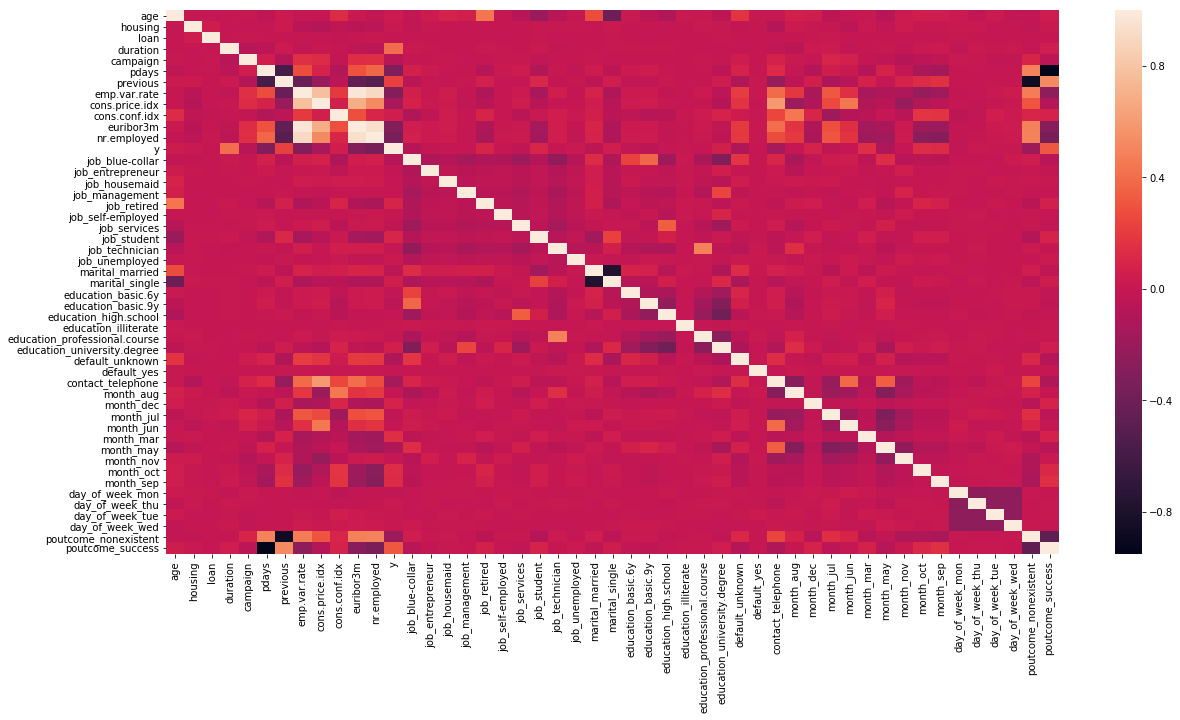

y                                1.000000
duration                         0.405274
poutcome_success                 0.316269
previous                         0.230181
month_mar                        0.144014
month_oct                        0.137366
month_sep                        0.126067
job_student                      0.093955
job_retired                      0.092221
month_dec                        0.079303
education_university.degree      0.057689
cons.conf.idx                    0.054878
marital_single                   0.054133
age                              0.030399
job_unemployed                   0.014752
day_of_week_thu                  0.013888
housing                          0.011085
day_of_week_tue                  0.008046
education_illiterate             0.007246
day_of_week_wed                  0.006302
education_professional.course    0.001003
job_management                  -0.000419
default_yes                     -0.003041
loan                            -0

In [192]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr())
plt.show()

df.corr()['y'].sort_values(ascending=False)

In [193]:
numerical_feature_columns = list(df_add._get_numeric_data().columns)
print (numerical_feature_columns)

categorical_feature_columns = list(set(df_add.columns) - set(df_add._get_numeric_data().columns))
print (categorical_feature_columns)


['age', 'housing', 'loan', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'marital_married', 'marital_single', 'education_basic.6y', 'education_basic.9y', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree', 'default_unknown', 'default_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success']
[]


In [97]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [195]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,f1_score,roc_auc_score,confusion_matrix,precision_score

##extract labels from feature matrix 
y=df['y']
x=df.drop(['y'],axis=1)

#split dataset into train and test
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=42)

rus = RandomUnderSampler(random_state=9)
X_under, y_under =  rus.fit_sample(X_train, y_train)

##apply undersampling 



In [196]:
from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(X_under, y_under)

print "accuracy score",accuracy_score(y_test,rf.predict(X_test))
print "f1_score", f1_score(y_test, rf.predict(X_test))
print precision_score(y_test, rf.predict(X_test))
print recall_score(y_test, rf.predict(X_test))
print roc_auc_score(y_test, rf.predict(X_test))
print confusion_matrix(y_test, rf.predict(X_test))

accuracy score 0.8598543367909953
f1_score 0.5814106789716545
0.4389515593895156
0.8607677293428757
0.8602528095951273
[[10365  1691]
 [  214  1323]]


In [197]:
from sklearn.tree import DecisionTreeClassifier 

##Decision Trees
dt = DecisionTreeClassifier(criterion='entropy')
dt.fit(X_under,y_under)

print "accuracy score",accuracy_score(y_test,dt.predict(X_test))
print "f1_score", f1_score(y_test, dt.predict(X_test))
print precision_score(y_test, dt.predict(X_test))
print recall_score(y_test, dt.predict(X_test))
print roc_auc_score(y_test, dt.predict(X_test))
print confusion_matrix(y_test, dt.predict(X_test))

accuracy score 0.8375634517766497
f1_score 0.5345699831365937
0.395385095104459
0.8249837345478205
0.8320754770947463
[[10117  1939]
 [  269  1268]]


In [198]:
from sklearn.ensemble import BaggingClassifier

### Bagging with Logistic Regression
bagging_clf1 = BaggingClassifier(LogisticRegression(), n_estimators=100, max_samples=100, 
                                bootstrap=True, random_state=9)

bagging_clf1.fit(X_under, y_under)
y_pred_bagging = bagging_clf1.predict(X_test)
print "accuracy score",accuracy_score(y_test, y_pred_bagging)
print "f1_score", f1_score(y_test, y_pred_bagging)
print precision_score(y_test, y_pred_bagging)
print recall_score(y_test, y_pred_bagging)
print roc_auc_score(y_test, y_pred_bagging)
print confusion_matrix(y_test, y_pred_bagging)

accuracy score 0.8541160891635401
f1_score 0.5792488860598345
0.4297858942065491
0.8880936890045543
0.8689390143761989
[[10245  1811]
 [  172  1365]]


In [199]:
bagging_clf2 = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=100, 
                                bootstrap=True, random_state=9)

bagging_clf2.fit(X_under, y_under)
y_pred_bagging = bagging_clf2.predict(X_test)
print "accuracy score",accuracy_score(y_test, y_pred_bagging)
print "f1_score", f1_score(y_test, y_pred_bagging)
print precision_score(y_test, y_pred_bagging)
print recall_score(y_test, y_pred_bagging)
print roc_auc_score(y_test, y_pred_bagging)
print confusion_matrix(y_test, y_pred_bagging)

accuracy score 0.8427867284631796
f1_score 0.5721721721721722
0.41324465008675537
0.929733246584255
0.8807176518256378
[[10027  2029]
 [  108  1429]]


In [425]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,SelectPercentile,f_classif
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE


model2= SelectKBest(f_classif,10)
#X_new = model.transform(X)

model2.fit(X_train, y_train)
X_new = model2.transform(X_train)

importance=pd.DataFrame([])
importance['Columns']=list(X_train.columns)
importance['value']=model2.scores_
tmp=importance['value'].sort_values(ascending=False)
feat=[]
for i in range(10):
    feat.append(importance.loc[tmp.index[i]][0])
  



In [257]:
X_select10=X_train[['duration', 'nr.employed', 'pdays', 'poutcome_success', 'euribor3m', 'emp.var.rate', 'previous', 'poutcome_nonexistent']]
X_tselect10=X_test[['duration', 'nr.employed', 'pdays', 'poutcome_success', 'euribor3m', 'emp.var.rate', 'previous', 'poutcome_nonexistent']]


In [427]:
rus = RandomOverSampler(random_state=9)
X_under, y_under =  rus.fit_sample(X_select10, y_train)


from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(X_under, y_under)

print "accuracy score",accuracy_score(y_test,rf.predict(X_tselect10))
print "f1_score", f1_score(y_test, rf.predict(X_tselect10))
print precision_score(y_test, rf.predict(X_tselect10))
print recall_score(y_test, rf.predict(X_tselect10))
print roc_auc_score(y_test, rf.predict(X_tselect10))
print confusion_matrix(y_test, rf.predict(X_tselect10))

 accuracy score 0.8901640550283234
f1_score 0.5361913637775707
0.5130796670630202
0.5614834092387768
0.7467752149047235
[[11237   819]
 [  674   863]]


In [428]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                             n_estimators=200,
                             algorithm="SAMME.R", 
                             learning_rate=0.5, 
                             random_state=42)
ada_clf.fit(X_under, y_under)

print "accuracy score",accuracy_score(y_test,ada_clf.predict(X_tselect10))
print "f1_score", f1_score(y_test, ada_clf.predict(X_tselect10))
print precision_score(y_test, ada_clf.predict(X_tselect10))
print recall_score(y_test, ada_clf.predict(X_tselect10))
print roc_auc_score(y_test, ada_clf.predict(X_tselect10))
print confusion_matrix(y_test, ada_clf.predict(X_tselect10))

accuracy score 0.865960420804826
f1_score 0.6007887817703769
0.4529236868186323
0.8919973975276513
0.8773192030770306
[[10400  1656]
 [  166  1371]]


In [652]:
# from xgboost import XGBClassifier

# xg = XGBClassifier()
# xg.fit(X_under, y_under)
# print "accuracy score",accuracy_score(y_test,xg.predict(X_tselect10))
# print "f1_score", f1_score(y_test, xg.predict(X_tselect10))
# print precision_score(y_test, xg.predict(X_tselect10))
# print recall_score(y_test, xg.predict(X_tselect10))
# print roc_auc_score(y_test, xg.predict(X_tselect10))
# print confusion_matrix(y_test, xg.predict(X_tselect10))

In [430]:
#### apply imputation with model building 
df1= bank_add_full.copy();
df1.replace('unknown',np.nan,inplace=True)
#print (df1.isnull().sum())

df1['job'].value_counts()
df1['job'].replace('unknown',df1['job'].mode()[0],inplace=True)
x= df1[df1.education.notnull()]
y_t= x['education']
x_t=pd.get_dummies(x[['job']])

from sklearn.preprocessing import LabelEncoder
lablel_encoder = LabelEncoder()
y_t = lablel_encoder.fit_transform(y_t)
labels=lablel_encoder.classes_


x_pred= df1[df1.education.isnull()]
x_p=pd.get_dummies(x_pred[['job']])
print x_p.shape
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_t, y_t)
rf.predict(x_p)
x_p['education']=labels[rf.predict(x_p)]
x_p['job']=x['job']

for i in range(x_p.shape[0]):
    df1.loc[x_p.index[i],'education']=x_p.loc[x_p.index[i],'education']


 (1731, 11)


In [431]:
df1['marital'].replace(np.nan,df1['marital'].mode()[0],inplace=True)
df1['housing'].replace(np.nan,df1['housing'].mode()[0],inplace=True)
df1['loan'].replace(np.nan,df1['loan'].mode()[0],inplace=True)
df1['default'].replace(np.nan,'unknown',inplace=True)
df1['housing']=df1['housing'].replace(['no','yes'],[0,1])
df1['loan']=df1['loan'].replace(['no','yes'],[0,1])
df1['y']=df1['y'].replace(['no','yes'],[0,1])
one_hot_encoding=pd.get_dummies(df1[['job','marital','education','default','contact','month', 'day_of_week','poutcome']], drop_first=True)
df1=pd.concat([df1,one_hot_encoding],axis=1)
df1.drop(['job','education','marital','default','contact','month', 'day_of_week','poutcome'],inplace=True,axis=1)
df1.shape

(41188, 49)

In [434]:
from xgboost import XGBClassifier

y=df1['y']
x=df1.drop(['y'],axis=1)

#split dataset into train and test
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=42)

rus = RandomOverSampler(random_state=9)
X_under, y_under =  rus.fit_sample(X_train, y_train)



ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                             n_estimators=200,
                             algorithm="SAMME.R", 
                             learning_rate=0.5, 
                             random_state=42)
ada_clf.fit(X_under, y_under)

print "accuracy score",accuracy_score(y_test,ada_clf.predict(X_test))
print "f1_score", f1_score(y_test, ada_clf.predict(X_test))
print precision_score(y_test, ada_clf.predict(X_test))
print recall_score(y_test, ada_clf.predict(X_test))
print roc_auc_score(y_test, ada_clf.predict(X_test))
print confusion_matrix(y_test, ada_clf.predict(X_test))

 accuracy score 0.8692709482822041
f1_score 0.6069453660694537
0.4597855227882037
0.8926480156148341
0.8794693296388703
[[10444  1612]
 [  165  1372]]


### EDUCATION AND DEFAULT IMPUTATION

In [624]:
bank_full = pd.read_csv("bank/bank-full.csv",delimiter=';') 
bank_add_full = pd.read_csv("bank-additional/bank-additional-full.csv",delimiter=';') 
bank_test= pd.read_csv("bank/bank.csv",delimiter=';') 

bf= bank_full.copy();
baf= bank_add_full.copy()
bf.replace('unknown',np.nan,inplace=True)
baf.replace('unknown',np.nan,inplace=True)
print bf.isnull().sum()
print baf.isnull().sum()
bf.head()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64
age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [625]:
bf['marital'].replace(np.nan,bf['marital'].mode()[0],inplace=True)
bf['housing'].replace(np.nan,bf['housing'].mode()[0],inplace=True)
bf['loan'].replace(np.nan,bf['loan'].mode()[0],inplace=True)
bf['housing']=bf['housing'].replace(['no','yes'],[0,1])
bf['default']=bf['default'].replace(['no','yes'],[0,1])
bf['loan']=bf['loan'].replace(['no','yes'],[0,1])
bf['y']=bf['y'].replace(['no','yes'],[0,1])
one_hot_encoding=pd.get_dummies(bf[['job','marital','contact']], drop_first=True)
bf=pd.concat([bf,one_hot_encoding],axis=1)
bf.drop(['balance','day','job','education','marital','contact','month','poutcome'],inplace=True,axis=1)
bf.head()

,age,default,housing,loan,duration,campaign,pdays,previous,y,job_blue-collar,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,contact_telephone
0,58,0,1,0,261,1,-1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,44,0,1,0,151,1,-1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,33,0,1,1,76,1,-1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,47,0,1,0,92,1,-1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,33,0,0,0,198,1,-1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [626]:
y= bf['default']
print bf.isnull().sum()
bf.drop(['default'],inplace=True,axis=1)

rus = RandomOverSampler(random_state=9)
X_under, y_under =  rus.fit_sample(bf, y)

rf = RandomForestClassifier()
rf.fit(X_under, y_under)


age                  0
default              0
housing              0
loan                 0
duration             0
campaign             0
pdays                0
previous             0
y                    0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
marital_married      0
marital_single       0
contact_telephone    0
dtype: int64


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [627]:
baf['marital'].replace(np.nan,baf['marital'].mode()[0],inplace=True)
baf['housing'].replace(np.nan,baf['housing'].mode()[0],inplace=True)
baf['loan'].replace(np.nan,baf['loan'].mode()[0],inplace=True)
baf['housing']=baf['housing'].replace(['no','yes'],[0,1])
baf['default']=baf['default'].replace(['no','yes'],[0,1])
baf['loan']=baf['loan'].replace(['no','yes'],[0,1])
baf['y']=baf['y'].replace(['no','yes'],[0,1])
one_hot_encoding=pd.get_dummies(baf[['job','marital','contact']], drop_first=True)
baf=pd.concat([baf,one_hot_encoding],axis=1)
baf.drop(['job','education','marital','contact','month','poutcome','day_of_week','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'],inplace=True,axis=1)
baf.head()
print baf.columns
print bf.columns
baf.head()

Index([u'age', u'default', u'housing', u'loan', u'duration', u'campaign',
       u'pdays', u'previous', u'y', u'job_blue-collar', u'job_entrepreneur',
       u'job_housemaid', u'job_management', u'job_retired',
       u'job_self-employed', u'job_services', u'job_student',
       u'job_technician', u'job_unemployed', u'marital_married',
       u'marital_single', u'contact_telephone'],
      dtype='object')
Index([u'age', u'housing', u'loan', u'duration', u'campaign', u'pdays',
       u'previous', u'y', u'job_blue-collar', u'job_entrepreneur',
       u'job_housemaid', u'job_management', u'job_retired',
       u'job_self-employed', u'job_services', u'job_student',
       u'job_technician', u'job_unemployed', u'marital_married',
       u'marital_single', u'contact_telephone'],
      dtype='object')


,age,default,housing,loan,duration,campaign,pdays,previous,y,job_blue-collar,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,contact_telephone
0,56,0.0,0,0,261,1,999,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,57,NaN,0,0,149,1,999,0,0,0,...,0,0,0,1,0,0,0,1,0,1
2,37,0.0,1,0,226,1,999,0,0,0,...,0,0,0,1,0,0,0,1,0,1
3,40,0.0,0,0,151,1,999,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,56,0.0,0,1,307,1,999,0,0,0,...,0,0,0,1,0,0,0,1,0,1


In [628]:
# numerical_feature_columns = list(baf._get_numeric_data().columns)
# print (numerical_feature_columns)

# categorical_feature_columns = list(set(baf.columns) - set(baf._get_numeric_data().columns))
# print (categorical_feature_columns)


x= baf[baf.default.isnull()]
x.head()

x_pred= x.drop(['default'],axis=1)

x_pred['default']=rf.predict(x_pred)
x_pred.shape

labels=['no','yes']
baf_f= bank_add_full.copy()

for i in range(x_pred.shape[0]):
    baf_f.loc[x_pred.index[i],'default']=labels[x_pred.loc[x_pred.index[i],'default']]

    


In [629]:
baf_f.replace('unknown',np.nan,inplace=True)
print baf_f.isnull().sum()
baf_f['job'].value_counts()
baf_f['job'].replace(np.nan,baf_f['job'].mode()[0],inplace=True)
x= baf_f[baf_f.education.notnull()]
y_t= x['education']
x_t=pd.get_dummies(x[['job']])

from sklearn.preprocessing import LabelEncoder
lablel_encoder = LabelEncoder()
y_t = lablel_encoder.fit_transform(y_t)
labels=lablel_encoder.classes_


x_pred= baf_f[baf_f.education.isnull()]
x_p=pd.get_dummies(x_pred[['job']])
print x_p.shape
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_t, y_t)
rf.predict(x_p)
x_p['education']=labels[rf.predict(x_p)]
x_p['job']=x['job']

for i in range(x_p.shape[0]):
    baf_f.loc[x_p.index[i],'education']=x_p.loc[x_p.index[i],'education']



age                  0
job                330
marital             80
education         1731
default              0
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64
(1731, 11)


In [630]:
baf_f['marital'].replace(np.nan,baf_f['marital'].mode()[0],inplace=True)
baf_f['housing'].replace(np.nan,baf_f['housing'].mode()[0],inplace=True)
baf_f['loan'].replace(np.nan,baf_f['loan'].mode()[0],inplace=True)
baf_f['housing']=baf_f['housing'].replace(['no','yes'],[0,1])
baf_f['loan']=baf_f['loan'].replace(['no','yes'],[0,1])
baf_f['default']=baf_f['default'].replace(['no','yes'],[0,1])
baf_f['y']=baf_f['y'].replace(['no','yes'],[0,1])
one_hot_encoding=pd.get_dummies(baf_f[['job','marital','education','contact','month', 'day_of_week','poutcome']], drop_first=True)
baf_f=pd.concat([baf_f,one_hot_encoding],axis=1)
baf_f.drop(['job','education','marital','contact','month','day_of_week','poutcome'],inplace=True,axis=1)
baf_f.shape

(41188, 48)

In [695]:
from xgboost import XGBClassifier

y=baf_f['y']
x=baf_f.drop(['y'],axis=1)

#split dataset into train and test
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.33,random_state=42)

rus = RandomOverSampler(random_state=9)
X_under, y_under =  rus.fit_sample(X_train, y_train)

from sklearn.ensemble import RandomForestClassifier


rf = RandomForestClassifier()
rf.fit(X_under, y_under)

print "accuracy score",accuracy_score(y_test,rf.predict(X_test))
print "f1_score", f1_score(y_test, rf.predict(X_test))
print precision_score(y_test, rf.predict(X_test))
print recall_score(y_test, rf.predict(X_test))
print roc_auc_score(y_test, rf.predict(X_test))
print confusion_matrix(y_test, rf.predict(X_test))

# for i in range(1,100):
#     rf2 = RandomForestClassifier(n_estimators = i,random_state =42)
#     rf2.fit(X_under, y_under)
#     l.append(precision_score(y_test, rf2.predict(X_test)))
#     print i,precision_score(y_test, rf2.predict(X_test)),accuracy_score(y_test,rf.predict(X_test))


rf2 = RandomForestClassifier(n_estimators = 40,random_state =42)
rf2.fit(X_under, y_under)
print "accuracy score",accuracy_score(y_test,rf2.predict(X_test))
print "f1_score", f1_score(y_test, rf2.predict(X_test))
print precision_score(y_test, rf2.predict(X_test))
print recall_score(y_test, rf2.predict(X_test))
print roc_auc_score(y_test, rf2.predict(X_test))
print confusion_matrix(y_test, rf2.predict(X_test))


accuracy score 0.9067166924152137
f1_score 0.5566433566433566
0.6016628873771731
0.5178919973975277
0.7370896616052005
[[11529   527]
 [  741   796]]
accuracy score 0.9093651143971162
f1_score 0.5893333333333333
0.6042378673957621
0.5751463890696161
0.7635602549196787
[[11477   579]
 [  653   884]]


In [690]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

log_clf = LogisticRegression()
rf_clf = RandomForestClassifier(n_estimators = 40,random_state =42)

# Hard Voting
voting_clf_hard = VotingClassifier(estimators = [('Logistic Regression', log_clf),
                                                ('Randomforest', rf_clf)],
                                  voting = 'soft')

voting_clf_hard.fit(X_under, y_under)
print "accuracy score",accuracy_score(y_test,voting_clf_hard.predict(X_test))
print "f1_score", f1_score(y_test, voting_clf_hard.predict(X_test))
print "precision",precision_score(y_test, voting_clf_hard.predict(X_test))
print recall_score(y_test, voting_clf_hard.predict(X_test))
print roc_auc_score(y_test, voting_clf_hard.predict(X_test))
print confusion_matrix(y_test, voting_clf_hard.predict(X_test))

VotingClassifier(estimators=[('Logistic Regression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)...stimators=40, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [700]:
### Bagging with Logistic Regression
bagging_clf1 = BaggingClassifier(LogisticRegression(), n_estimators=100, max_samples=100, 
                                bootstrap=True, random_state=9)

bagging_clf1.fit(X_under, y_under)
y_pred_bagging = bagging_clf1.predict(X_test)
print "accuracy score",accuracy_score(y_test, y_pred_bagging)
print "f1_score", f1_score(y_test, y_pred_bagging)
print precision_score(y_test, y_pred_bagging)
print recall_score(y_test, y_pred_bagging)
print roc_auc_score(y_test, y_pred_bagging)
print confusion_matrix(y_test, y_pred_bagging)

accuracy score 0.858382991245494
f1_score 0.5814307458143074
0.4366427171783148
0.8698763825634352
0.8633970499413062
[[10331  1725]
 [  200  1337]]


### REMOVED ALL TIME RELATED FEATURES WITH SAME IMPUTATION

In [691]:
X_select10= X_train[['age', 'default', 'housing', 'loan', 'campaign',
       'pdays', 'previous', u'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course','education_university.degree',
       u'contact_telephone']]

X_tselect10= X_test[['age', 'default', 'housing', 'loan', 'campaign',
       'pdays', 'previous', u'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course','education_university.degree',
       u'contact_telephone']]

#X_select10=X_train[['age','duration', 'nr.employed', 'pdays', 'poutcome_success', 'euribor3m', 'emp.var.rate', 'previous', 'poutcome_nonexistent','default']]
#X_tselect10=X_test[['age','duration', 'nr.employed', 'pdays', 'poutcome_success', 'euribor3m', 'emp.var.rate', 'previous', 'poutcome_nonexistent','default']]

rus = RandomOverSampler(random_state=9)
X_under, y_under =  rus.fit_sample(X_select10, y_train)


from sklearn.ensemble import RandomForestClassifier


# for i in range(1,100):
#     rf = RandomForestClassifier(n_estimators = 60,random_state =42)
#     rf.fit(X_under, y_under)
#     l.append(precision_score(y_test, rf.predict(X_tselect10)))
#     print i,precision_score(y_test, rf.predict(X_tselect10)),accuracy_score(y_test,rf.predict(X_tselect10))

rf = RandomForestClassifier(n_estimators = 60,random_state =42)
rf.fit(X_under, y_under)
print "accuracy score",accuracy_score(y_test,rf.predict(X_tselect10))
print "f1_score", f1_score(y_test, rf.predict(X_tselect10))
print precision_score(y_test, rf.predict(X_tselect10))
print recall_score(y_test, rf.predict(X_tselect10))
print roc_auc_score(y_test, rf.predict(X_tselect10))
print confusion_matrix(y_test, rf.predict(X_tselect10))

accuracy score 0.8780254542779372
f1_score 0.41413427561837457
0.4532095901005414
0.38126219908913467
0.6613095998763523
[[11349   707]
 [  951   586]]
